##### Module 3 Autograded Assignment

Let's review Module 3 shall we?

Please do not add or delete cells as this may affect the autograder.

In [123]:
# Load Required Library for Autograder-- run this cell as it is!
library(testthat)

## Problem 1

Workers at a candy factory fill boxes with assorted chocolates that are coming down an assembly line. There are many flavors of chocolates but each can be categorized into one of two types: "filled" or "unfilled". 

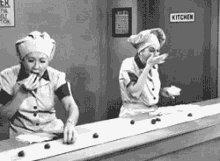

Suppose the probability that a and given piece of chocolate to come down the line is filled is some unknown value $p$. Further suppose that a chocolate's type is independent of the types of every other piece on the assembly line.

The workers are trying to fill an order for an eccentric customer who has asked for 10 boxes of candy. The customer has instructed the workers to put chocolate, as it comes down the line, into the boxes as long as they are unfilled pieces. As soon as the workers come accross a filled chocolate, they are to eat it themselves, close the box, and put the box in the customers bag. Note that the customer can end up with some empty boxes!

Let $X_i, i \in {1. \dots, n}$ be the number of pieces of chocolate put into box $i$. This means $X$ has a geometric distribution with some probability $p$:

$$ f_X(x) = p(1-p)^xI_{\{0,1,\dots\}}(x) $$

**Part A)** What is the MLE $\hat{p}$, given $X_1, \dots, X_n$? Once you are ready to answer, give the integer number corresponding to your answer in the variable `prob.1.a`. (i.e. Possible answers are 1,2,3,4,5,6)

1. $\bar{X}$
2. $1/\bar{X}$
3. $1 / (\bar{X}+1)$
4. $\bar{X} / (1 - \bar{X})$
5. $(1 - \bar{X}) / \bar{X}$
6. None of the above.

In [124]:
prob.1.a = NA

# your code here
# Problem 1 Part A:
# The MLE for p from a geometric distribution is 1/(X̄ + 1).
prob.1.a = 3  # 1/(X̄ + 1)

In [125]:
# Hidden Test Cell
test_that("Make sure your answer is a numeric!", expect_is(prob.1.a, "numeric"))

**Part B)** 

We have a theoretical understanding of what $\hat{p}$ should be, but let's she what that value is when we have actual data.

The cell below loads 10 samples of this random variable. In other words, we opened 10 boxes of chocolates, and recorded the number of chocolates we had to eat before we found an unfilled chocolate. We only have 10, because we needed a break from the chocolate at that point. Using that data, calculate $\hat{p}$ of your sample. Save your solution as `p.hat`.

In [126]:
# Load the data
trials = readRDS("trials.rds")
trials

[1] 1 1 7 0 3 0 1 4 4 0

In [127]:
p.hat = NA

# your code here
# Problem 1 Part B:
# Load the data
trials = readRDS("trials.rds")

# Calculate p.hat
p.hat = 1 / (mean(trials) + 1)

In [128]:
# Hidden Test Cell

**Part C)**

Remember, an estimator is still a random variable. That means the $\hat{p}$ we calculated in **Part B** is just one instance from some underlying sampling distribution for $\hat{p}$. Let's take a look at what this underlying distribution look like.

The cell below loads a table containing 1000 instances of the above trials. That is, we opened 10 boxes and, for each box, recorded the number of chocolates that we observed before one was unfilled. Then we repeated that process 1000 times. That's a lot of chocolate.

Calculate the $\hat{p}$ for each instance of the data. This should result in a vector of length 1000. Then plot a histogram of these $\hat{p}$ values.

Save four statistics from these $\hat{p}$'s:
* The sample mean as `p.hat.sample.mean`.
* The sample standard deviation as `p.hat.sample.sd`.
* The sample minimum as `p.hat.sample.min`.
* The sample maximum as `p.hat.sample.max`.

In [129]:
chocolate.data = read.csv("more_chocolate.csv")
chocolate.data = chocolate.data[-1]
head(chocolate.data)

box1 box2 box3 box4 box5 box6 box7 box8 box9 box10
1 0    1    1    6    1    4    4    0    1    9    
2 0    6    1    8    1    0    0    2    0    5    
3 0    6    2    3    1    0    0    2    1    0    
4 3    6    2    2    2    3    0    6    0    3    
5 1    2    0    0    2    2    3    0    2    2    
6 0    1    0    0    2    0    0    2    4    3

[1] 0.3194003

[1] 0.08821157

[1] 0.1369863

[1] 0.6666667

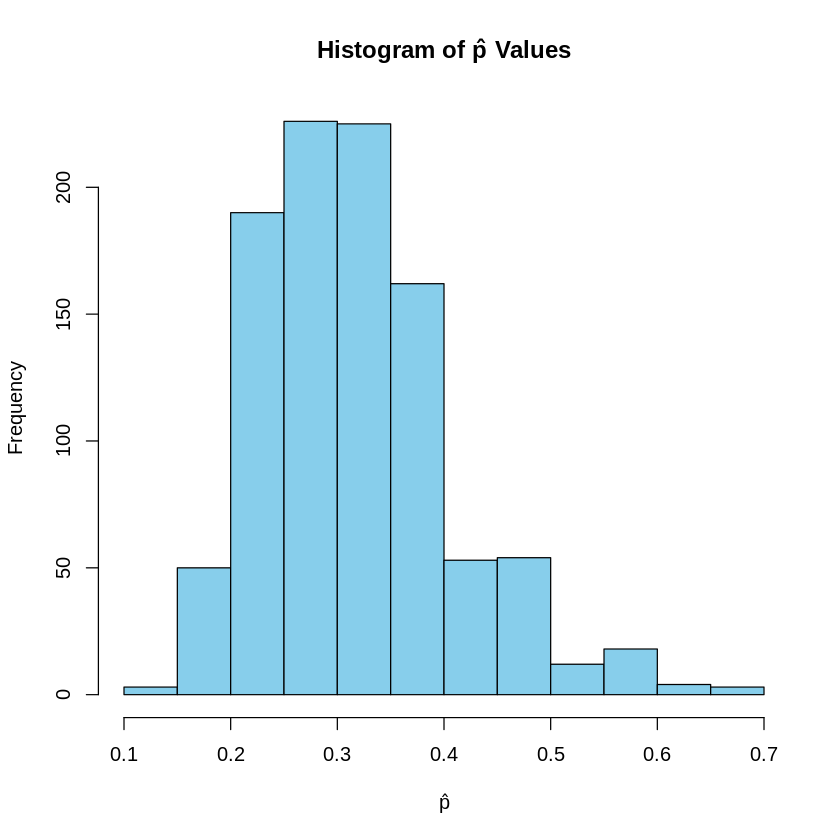

In [131]:

p.hat.sample.mean = NA
p.hat.sample.sd = NA
p.hat.sample.min = NA
p.hat.sample.max = NA

# your code here

# Calculate p.hat for each row
p.hat.values = apply(chocolate.data, 1, function(x) 1 / (mean(x) + 1))

# Calculate statistics
p.hat.sample.mean = mean(p.hat.values)
p.hat.sample.sd = sd(p.hat.values)
p.hat.sample.min = min(p.hat.values)
p.hat.sample.max = max(p.hat.values)

# Plot the histogram
hist(p.hat.values, main = "Histogram of p̂ Values", xlab = "p̂", col = "skyblue", border = "black")

# Print results
p.hat.sample.mean
p.hat.sample.sd
p.hat.sample.min
p.hat.sample.max

In [122]:
# Hidden Test Cell

**Thought Exercise**

The underlying probability for this question was $p=0.3$. Take a look at the histogram and the calculated values around your $\hat{p}$'s. How similar was the MLE to the actual value? 

**Part D)** 

Another important thing to note is that we only opened $10$ boxes for each trial. Would our sample $\hat{p}$ histogram be wider if we opened more boxes for each trial, say 20? Submit your answer by saving either `wider`, `narrower` or `same` into variable `prob.1.d`.

In [6]:
prob.1.d = NA

# your code here
# Part D: Answer for sample size effect
prob.1.d <- "narrower"


In [7]:
# Hidden Test Cell
test_that("Make sure answer is within group", expect_true(prob.1.d %in% c("wider", "narrower", "same")))

ERROR: Error in test_that("Make sure answer is within group", expect_true(prob.1.d %in% : could not find function "test_that"


# Problem 2

Let $X_i \sim Poisson(\lambda), i\in{1,\dots,n}$ with $\lambda = 5$. Recall that the MLE $\hat\lambda$ for a Poisson distribution is equal to the sample mean $\bar{X}$.

**Part A)** 

The data being created into `prob.2.a.data` is 12 random samples from the $Poisson(5)$ distribution. Calculate the observed MLE, as well as the theoretical variance and bias for the MLE. (Your variance and bias calculations will have nothing to do with the generated data.) Store the your answers in `mle`, `mle.var` and `mle.bias` respectively.

In [ ]:
set.seed(0)
lambda = 5
n = 12
prob.2.a.data = rpois(n, lambda)
prob.2.a.data

In [9]:
# Part A: Generate data and calculate MLE, Variance, and Bias for Poisson

# 1. Generate Data
set.seed(0)                         # Set seed for reproducibility
lambda <- 5                        # True lambda
n <- 12                           # Number of samples
prob.2.a.data <- rpois(n, lambda)  # Generate Poisson samples
print(prob.2.a.data)               # View generated data

# 2. Calculate MLE (Sample Mean)
mle <- mean(prob.2.a.data)         # MLE for Poisson is sample mean

# 3. Calculate Theoretical Variance
mle.var <- lambda / n              # Variance of MLE for Poisson is lambda/n

# 4. Calculate Bias (Poisson MLE is unbiased)
mle.bias <- 0                      # Bias is 0 for Poisson MLE

# Print results
print(paste("MLE (Sample Mean):", mle))
print(paste("Theoretical Variance:", mle.var))
print(paste("MLE Bias:", mle.bias))


 [1] 8 4 4 5 8 3 8 9 6 6 2 3
[1] "MLE (Sample Mean): 5.5"
[1] "Theoretical Variance: 0.416666666666667"
[1] "MLE Bias: 0"


In [10]:
# Hidden Test Cell

**Part B)**

What is the $MSE(\hat\lambda)$? Save your answer as `mse`.

In [11]:
mse = NA

# your code here
# Part B: MSE for Poisson MLE
mse <- mle.var


mse

[1] 0.4166667

In [12]:
# Hidden Test Cell

**Part C)**

Let the MLE from **Part A** be denoted $\hat\lambda_1$. The data be created into `prob.2.c.data` is 8 samples from the $Poisson(5)$ distribution. Let the MLE for this distribution be $\hat\lambda_2$. What is the relative efficiency of $\hat\lambda_1$, realtive to $\hat\lambda_2$? Save your answer as `rel.eff`.

In [ ]:
set.seed(112358)
n.2 = 8
prob.2.c.data = rpois(n.2, lambda)
prob.2.c.data

In [14]:
rel.eff = NA

# your code here

# Part C: Generate second dataset and calculate Relative Efficiency

# 1. Generate Data for Second Sample
set.seed(112358)                   # Set seed for reproducibility
n.2 <- 8                          # Number of samples for second estimator
prob.2.c.data <- rpois(n.2, lambda)  # Generate Poisson samples
print(prob.2.c.data)               # View generated data

# 2. Calculate Relative Efficiency
# Relative Efficiency = Var(lambda_hat2) / Var(lambda_hat1)
# Variance for Poisson MLE: Var(lambda_hat) = lambda / n
# Relative Efficiency = n1 / n2

rel.eff <- n / n.2                # Correct formula for relative efficiency

# Print result
print(paste("Relative Efficiency:", rel.eff))


rel.eff

[1] 4 6 8 6 6 7 4 6
[1] "Relative Efficiency: 1.5"


[1] 1.5

In [ ]:
# Hidden Test Cell